In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desktop_data/DATA/us_income_zipcode.csv')

# Display the first few rows of the dataset
data.head()


,ZIP,Geography,Geographic Area Name,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error","Households $15,000 to $24,999",...,"Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,33.2,4.4,15.7,2.9,23.9,...,0.0,2.8,0.0,2.8,9386.0,1472.0,13044.0,1949.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,27.1,2.9,12.7,2.1,20.5,...,0.0,1.3,0.0,1.3,11242.0,1993.0,16419.0,2310.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,32.1,2.5,13.4,1.6,17.2,...,0.6,0.6,0.2,0.4,10639.0,844.0,16824.0,2217.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,28.4,5.5,13.3,4.4,23.3,...,0.0,7.5,0.0,7.5,15849.0,3067.0,16312.0,2662.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,20.5,2.5,13.2,2.5,23.3,...,0.0,1.8,0.0,1.8,12832.0,2405.0,16756.0,1740.0,14.5,2021.0


In [ ]:
# Check for missing values
data.isnull().sum()

ZIP                                                                 0
Geography                                                           0
Geographic Area Name                                                0
Households                                                         59
Households Margin of Error                                         59
                                                                ...  
Nonfamily Households Median Income (Dollars) Margin of Error    46813
Nonfamily Households Mean Income (Dollars)                      32043
Nonfamily Households Mean Income (Dollars) Margin of Error      32043
Nonfamily Households Nonfamily Income in the Past 12 Months     13646
Year                                                                0
Length: 111, dtype: int64

In [ ]:
#clearn data
# Drop rows where 'Households' is missing
data = data.dropna(subset=['Households'])

# Drop columns with more than 50% missing data
data = data.dropna(thresh=len(data)*0.5, axis=1)

# Check the cleaned data
data.isnull().sum()


ZIP                                                                 0
Geography                                                           0
Geographic Area Name                                                0
Households                                                          0
Households Margin of Error                                          0
                                                                ...  
Nonfamily Households Median Income (Dollars) Margin of Error    46754
Nonfamily Households Mean Income (Dollars)                      31984
Nonfamily Households Mean Income (Dollars) Margin of Error      31984
Nonfamily Households Nonfamily Income in the Past 12 Months     13587
Year                                                                0
Length: 109, dtype: int64

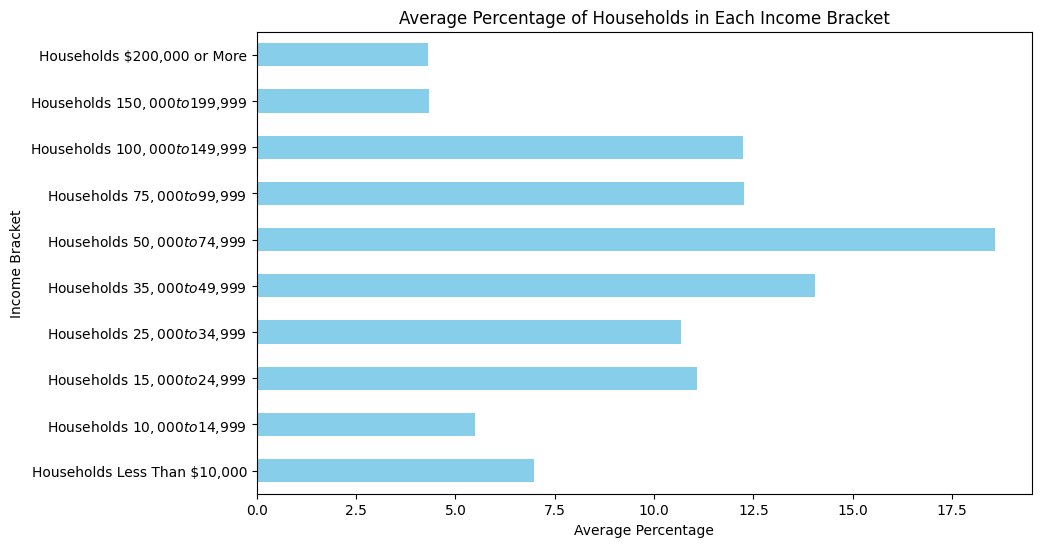

In [ ]:
#bar chart showing the average percentage of households in each of these income brackets across all zip codes

import matplotlib.pyplot as plt

# Define the income brackets we are interested in
income_brackets = [
    "Households Less Than $10,000",
    "Households $10,000 to $14,999",
    "Households $15,000 to $24,999",
    "Households $25,000 to $34,999",
    "Households $35,000 to $49,999",
    "Households $50,000 to $74,999",
    "Households $75,000 to $99,999",
    "Households $100,000 to $149,999",
    "Households $150,000 to $199,999",
    "Households $200,000 or More"
]

# Calculate the average percentage of households in each income bracket
avg_percentages = data[income_brackets].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_percentages.plot(kind='barh', color='skyblue')
plt.title('Average Percentage of Households in Each Income Bracket')
plt.xlabel('Average Percentage')
plt.ylabel('Income Bracket')
plt.show()


In [ ]:
data['Year'].unique()


array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011.])

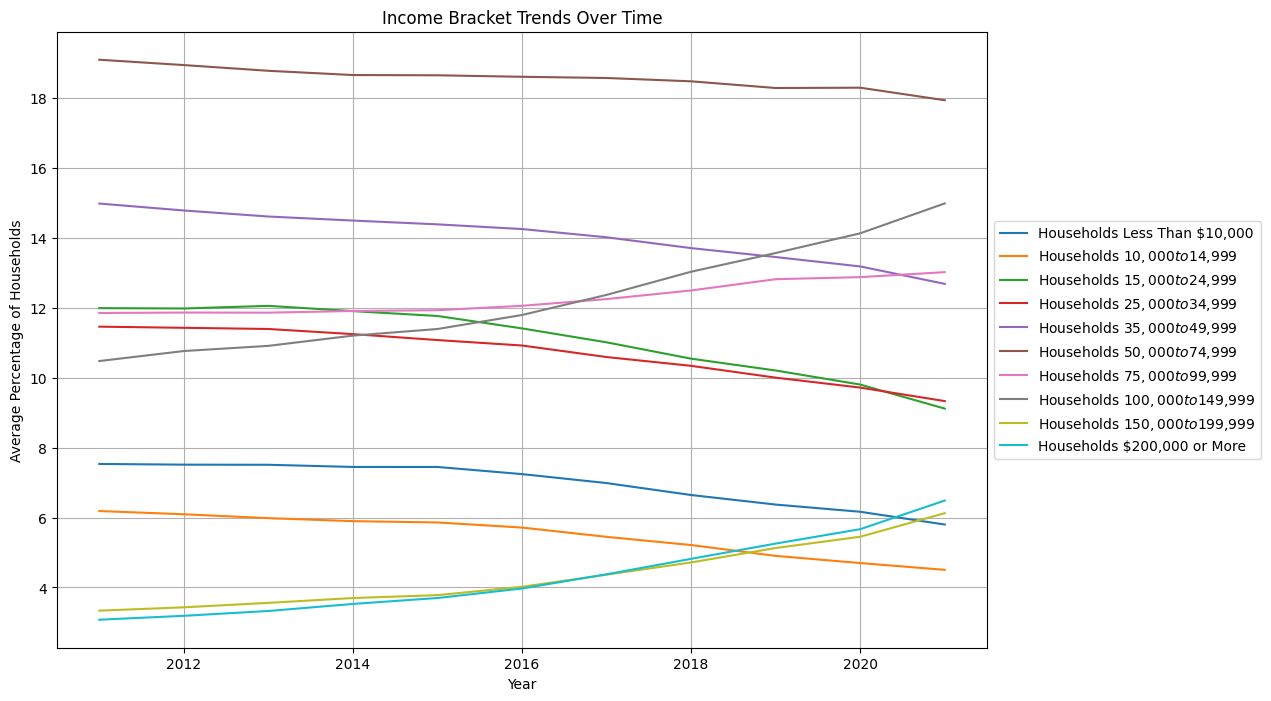

In [ ]:
# Group the data by year and calculate the mean percentage for each income bracket
income_by_year = data.groupby('Year')[income_brackets].mean()

# Plot the trends over time
plt.figure(figsize=(12, 8))

for bracket in income_brackets:
    plt.plot(income_by_year.index, income_by_year[bracket], label=bracket)

plt.title('Income Bracket Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Households')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Filter the data for the most recent year
data_2021 = data[data['Year'] == 2021]

# Sort the data by median household income
data_2021_sorted = data_2021.sort_values('Households Median Income (Dollars)')

# Select the zip codes to analyze
low_zip = data_2021_sorted.iloc[0]['ZIP']
high_zip = data_2021_sorted.iloc[-1]['ZIP']
# Recalculate the middle zip codes
middle_zips = data_2021_sorted.iloc[
    [int(i) for i in np.linspace(1, len(data_2021_sorted)-2, 8)]
]['ZIP']
selected_zips = [low_zip, *middle_zips, high_zip]

# Filter the original dataset for these zip codes
selected_data = data[data['ZIP'].isin(selected_zips)]

# Display the selected zip codes
selected_zips


[76429, 22904, 38316, 61085, 60934, 97350, 98125, 2114, 99923, 99927]

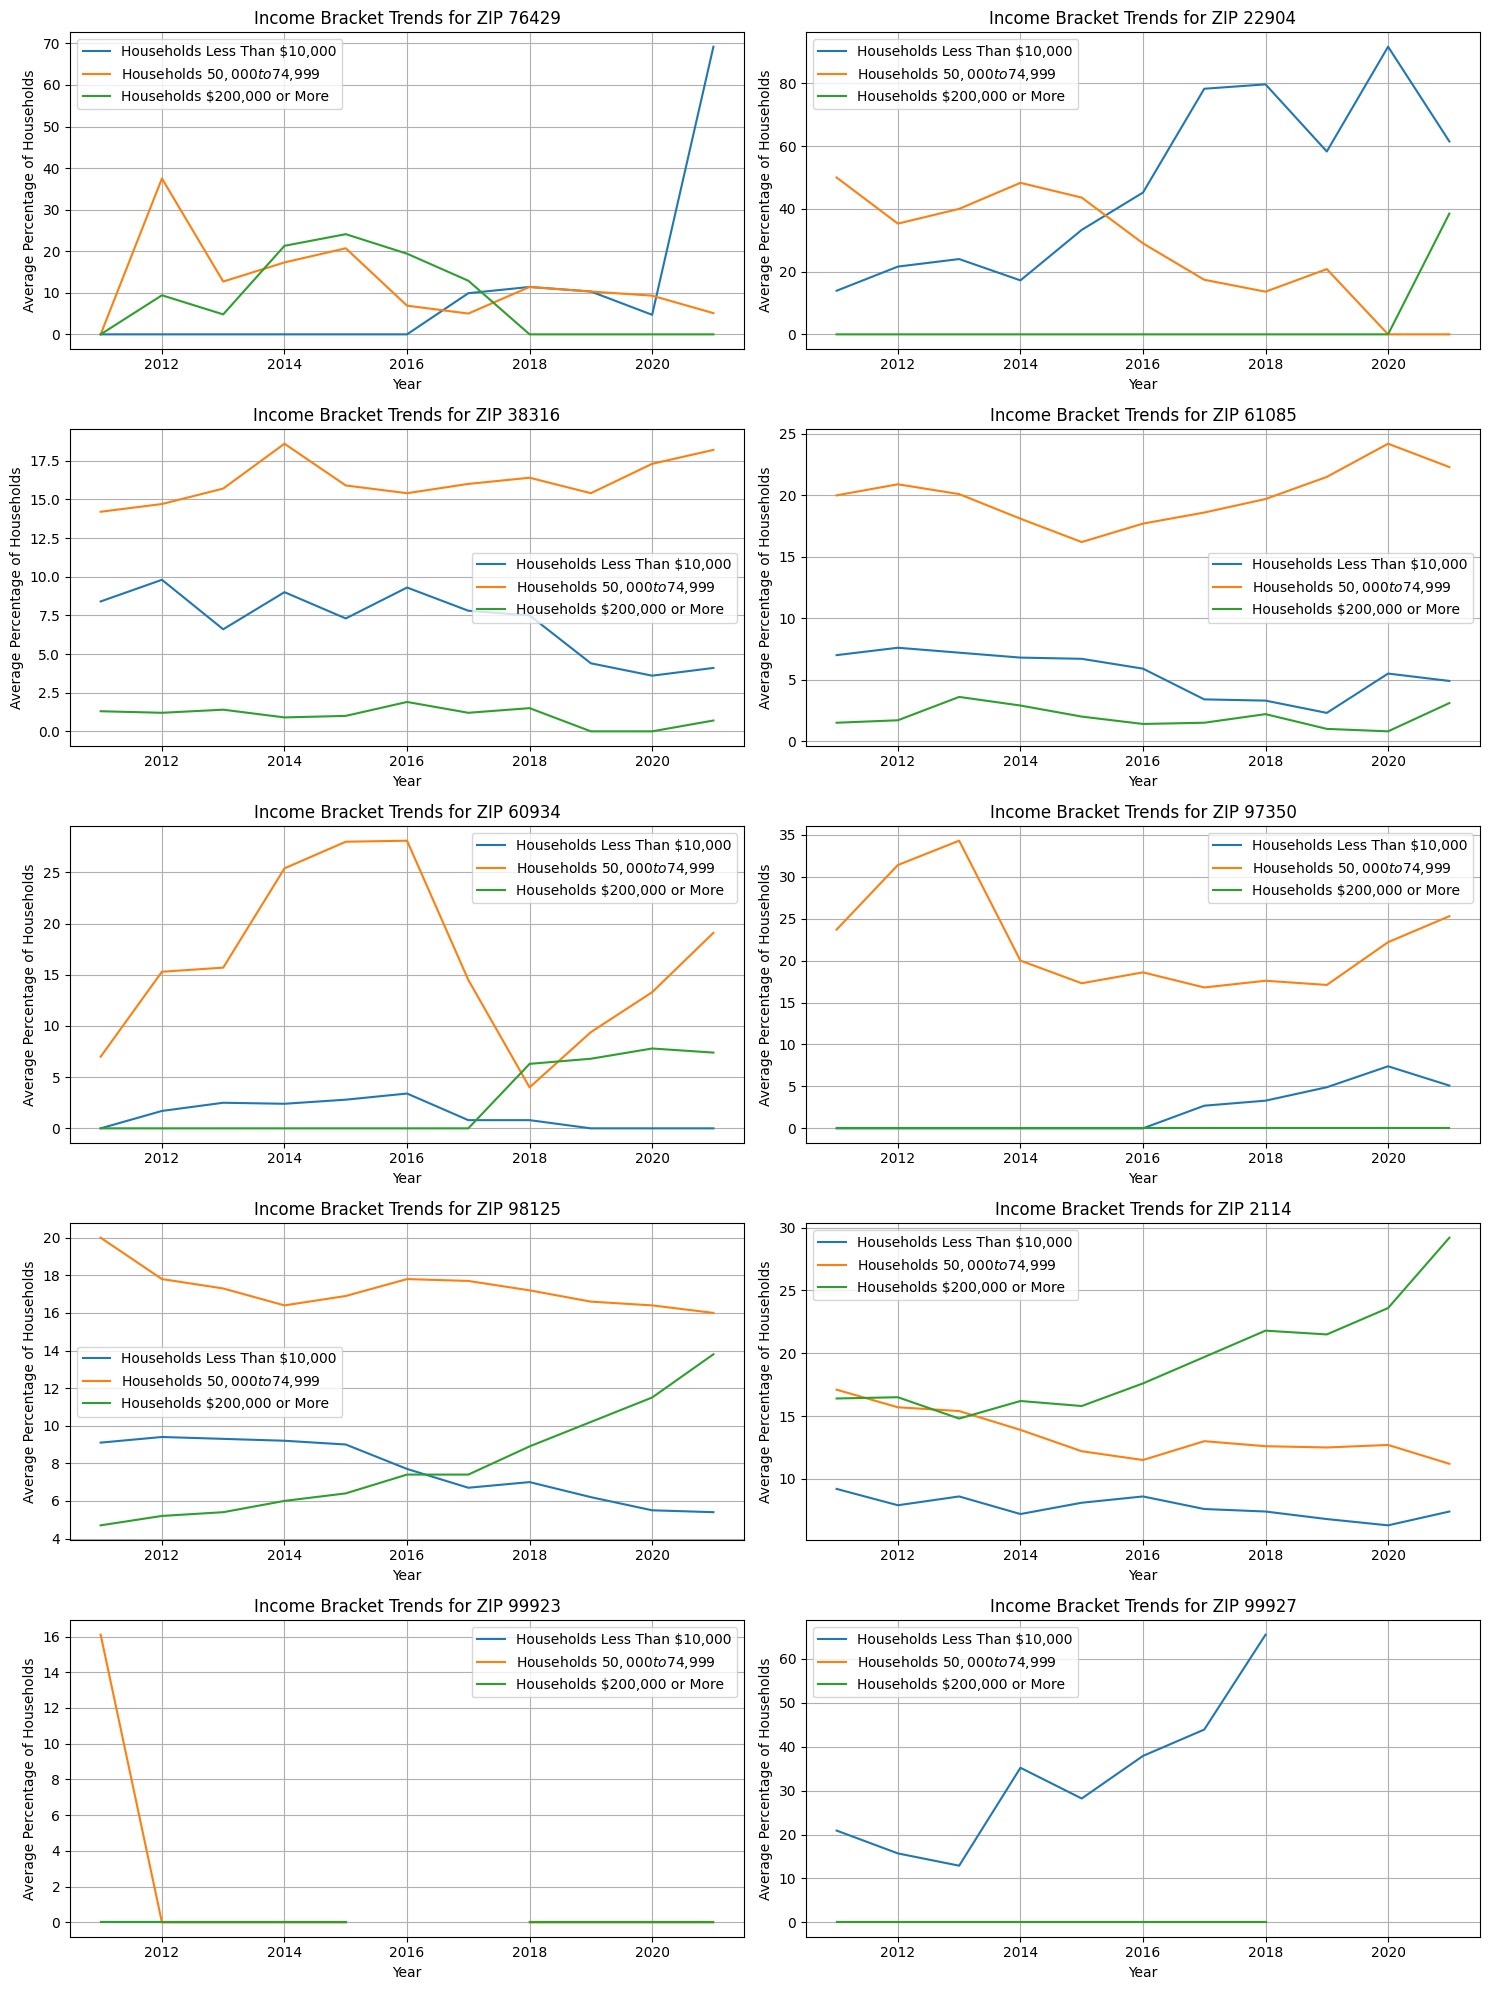

In [ ]:
# Define the income brackets we are interested in
key_income_brackets = [
    "Households Less Than $10,000",
    "Households $50,000 to $74,999",
    "Households $200,000 or More"
]

# Generate the plots for each ZIP code
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.ravel()

for i, zip_code in enumerate(selected_zips):
    ax = axes[i]

    # Filter the data for the current ZIP code and calculate the mean percentage for each income bracket
    income_by_year = selected_data[selected_data['ZIP'] == zip_code][key_income_brackets + ['Year']].groupby('Year').mean()

    # Plot the trends over time
    for bracket in key_income_brackets:
        ax.plot(income_by_year.index, income_by_year[bracket], label=bracket)

    ax.set_title(f'Income Bracket Trends for ZIP {zip_code}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Percentage of Households')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()


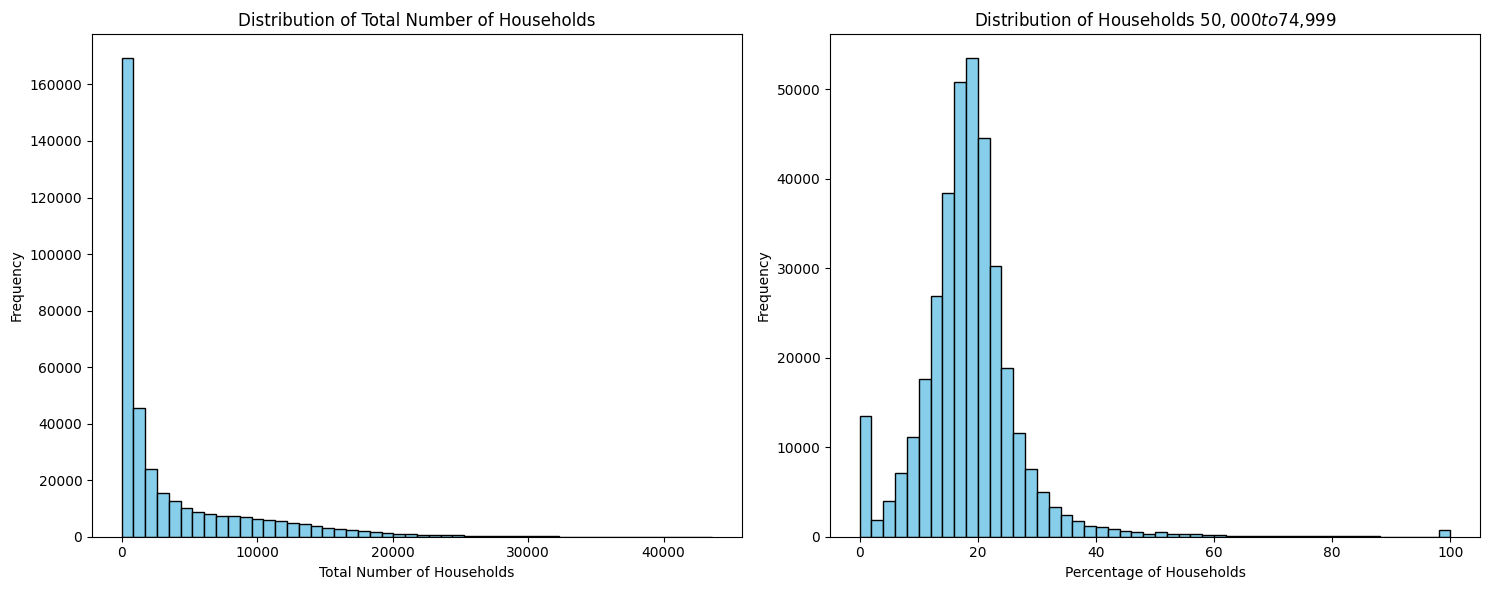

In [ ]:
# Create histograms for the total number of households and the percentage of households in the "$50,000 to $74,999" bracket
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the histogram for the total number of households
axes[0].hist(data['Households'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Total Number of Households')
axes[0].set_xlabel('Total Number of Households')
axes[0].set_ylabel('Frequency')

# Plot the histogram for the percentage of households in the "$50,000 to $74,999" bracket
axes[1].hist(data['Households $50,000 to $74,999'], bins=50, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution of Households $50,000 to $74,999')
axes[1].set_xlabel('Percentage of Households')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

